## 프로젝트 1. load_digits : 손글씨를 분류해보자
#### (1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### (2) 데이터 준비하기

In [2]:
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

#### (3) 데이터 이해하기

In [3]:
print(digits.keys())
print(digits_data.shape)  # 1797개의 데이터가 각각 64개의 숫자(8x8)로 이루어져 있다. 
print(digits_label.shape)
print(digits.target_names)
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different

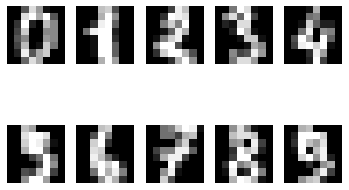

In [4]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') # 픽셀값이기 때문에 8x8로 reshape.
  plt.axis('off')
plt.show()

#### (4) train, test 데이터 분리

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=15)

#### (5-1) Decision Tree 모델 학습

In [6]:
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



#### (5-2) Random Forest 모델 학습

In [7]:
random_forest = RandomForestClassifier(random_state = 15) # random_state : 난수 seed 설정
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.97      0.97      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.95      0.98      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.99        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



#### (5-3) SVM 모델 학습

In [8]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



####(5-4) SGD 모델 학습

In [9]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      0.95      0.95        38
           2       1.00      0.97      0.99        38
           3       1.00      0.85      0.92        27
           4       0.98      0.98      0.98        41
           5       0.97      0.97      0.97        35
           6       1.00      0.95      0.97        38
           7       1.00      1.00      1.00        34
           8       0.80      0.91      0.85        35
           9       0.91      0.98      0.94        43

    accuracy                           0.96       360
   macro avg       0.96      0.95      0.96       360
weighted avg       0.96      0.96      0.96       360



#### (5-5) Logistic Regression 모델 학습

In [10]:
logistic_model = LogisticRegression(max_iter=3000)  # max_iter 
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.93      1.00      0.96        41
           5       0.94      0.97      0.96        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.94      0.94      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



#### (6) 모델 성능 평가하기

>digits의 경우 주어진 값을 정확히 맞추는게 가장 중요한 것 같아서 accuracy가 모델의 성능 평가 지표로 가장 적절하다고 생각한다.  
물론 accuracy는 데이터가 불균형할 때는 평가 지표로 삼기 힘들겠지만, digits의 경우 대체로 0에서 9까지 고르기 때문에 상관 없을 것 같다.  
Decision Tree보다 Random Forest 모델이 accuracy가 높았고,  accuracy가 가장 높았던 모델은 SVM이었다. 아마 클래스가 10개라서 고차원 변환으로 학습하는 SVM이 가장 높게 나온 것 같다.  

<br>
<br>

## 프로젝트 2. load_wine : 와인을 분류해보자. 
#### (2) 데이터 준비하기

In [11]:
wine = load_wine()
wine_data = wine.data
wine_label = wine.target

#### (3) 데이터 이해하기

In [12]:
print(wine.keys())
print(wine_data.shape)  # 178개의 데이터, 13개의 와인 특성 feature와 class 0, 1, 2의 label 
print(wine_label.shape)
print(wine.target_names)
print(wine.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
(178, 13)
(178,)
['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:        

In [13]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


#### (4) train, test 데이터 분리하기

In [14]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=15)

#### (5-1) Decision Tree 모델 학습

In [15]:
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.83      0.87        12
           2       0.92      0.92      0.92        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



#### (5-2) Random Forest 모델 학습

In [16]:
random_forest = RandomForestClassifier(random_state = 15) # random_state : 난수 seed 설정
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### (5-3) SVM 모델 학습

In [17]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.50      0.92      0.65        12
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.43      0.61      0.50        36
weighted avg       0.43      0.61      0.50        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####(5-4) SGD 모델 학습

In [18]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.38      1.00      0.55        12
           2       0.00      0.00      0.00        12

    accuracy                           0.44        36
   macro avg       0.46      0.44      0.35        36
weighted avg       0.46      0.44      0.35        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### (5-5) Logistic Regression 모델 학습

In [19]:
logistic_model = LogisticRegression(max_iter=3000)  # max_iter 
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



#### (6) 모델 성능 평가하기

>wine의 경우도 각 클래스의 값 분포가 거의 일정해서 모델의 성능을 평가하는 지표로 accuracy가 적당하다고 생각한다.  
사실 precission이나 recall, accuracy 모든 면에서 Random Forest 모델이 압도적이었는데,  
SVM이나 SGD의 경우 특정 feature의 값의 범위가 크게 차이가 나서 accuracy가 떨어지지 않았나 추측된다.  

<br>
<br>  


## 프로젝트 3. load_breast_cancer : 유방암 여부를 진단해보자. 
#### (2) 데이터 준비하기

In [20]:
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_label = cancer.target

#### (3) 데이터 이해하기

In [21]:
print(cancer.keys())
print(cancer_data.shape)  # 569개의 데이터, 30개의 feature와 악성, 양성의 label 
print(cancer_label.shape)
print(cancer.target_names)
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
(569,)
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three

In [22]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


#### (4) train, test 데이터 분리하기

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=15)

#### (5-1) Decision Tree 모델 학습

In [24]:
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



#### (5-2) Random Forest 모델 학습

In [25]:
random_forest = RandomForestClassifier(random_state = 15) # random_state : 난수 seed 설정
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



#### (5-3) SVM 모델 학습

In [26]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.85      0.97      0.91        75

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



####(5-4) SGD 모델 학습

In [27]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        39
           1       1.00      0.45      0.62        75

    accuracy                           0.64       114
   macro avg       0.74      0.73      0.64       114
weighted avg       0.82      0.64      0.63       114



#### (5-5) Logistic Regression 모델 학습

In [28]:
logistic_model = LogisticRegression(max_iter=3000)  # max_iter 
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.91      0.93      0.92        75

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



#### (6) 모델 성능 평가하기
>breast_cancer은 악성을 양성으로 판단하면 안 되기 때문에 recall을 가장 중요한 평가지표로 정했다.  
악성이나 양성을 판정하는 이진 분류여서 그런지 Decision Tree와 Random Forest의 recall 값이 가장 높았고, Logistic Regression이 그 다음으로 높았다. breast_cancer도 wine과 마찬가지로 예측에 영향을 주는 feature가 많은데 특정 feature들의 값의 범위가 차이가 나서인지 SVM, SGD 모델의 성능이 안 좋게 나온 것 같다.